<a id="1"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 1 </p> 

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from tensorflow import keras
import keras_tuner

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [89]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.10.0
Keras version: 2.10.0


<a id="2"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 2 </p> 

In [90]:
import pandas as pd

# Load the dataset
df = pd.read_csv('wine.csv')   # https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

# Display the dimensions of the dataset (rows, columns)
print("Dataset dimensions:" , df.shape)

# Display the first few rows of the dataset
df.head()

Dataset dimensions: (1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad

<a id="3"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 3 </p> 

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [91]:
df.quality.unique()  

array(['bad', 'good'], dtype=object)

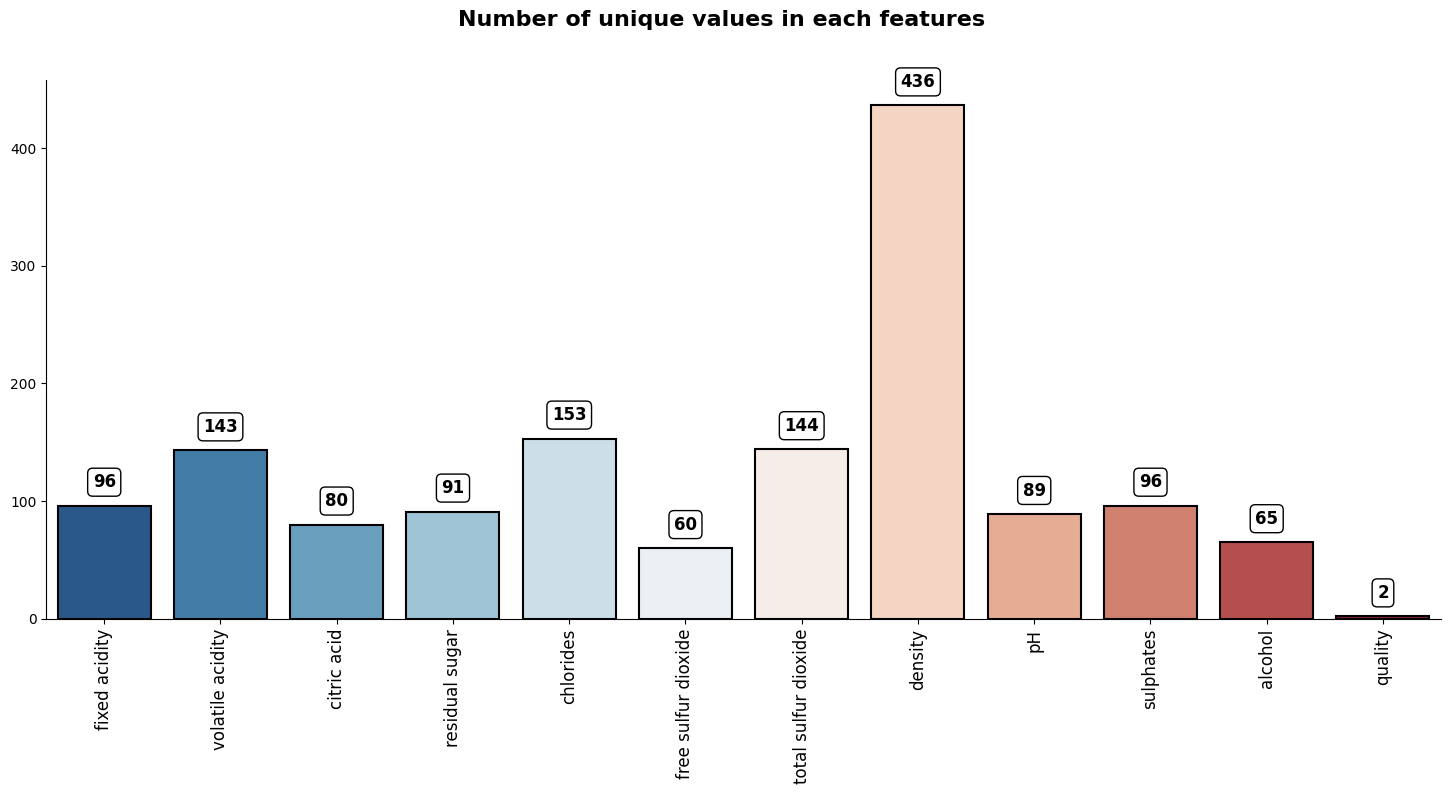

In [75]:
plt.figure(figsize=(18,7))

ax = sns.barplot(x=df.columns, y=df.nunique().values, 
            palette='RdBu_r', linewidth=1.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'))
    
plt.suptitle(t = 'Number of unique values in each features', fontsize = 16, weight = 'bold') 
sns.despine()
plt.show()

Quality is categorical , encoding the 'quality' labels to numerical values

In [92]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])

In [93]:
df.quality.unique()  

array([0, 1])

<a id="4"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 4 </p> 

In [12]:
features= df.columns[0:-1]
target = df.columns[-1]

In [13]:
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
target

'quality'

In [15]:
X = df[features]
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [16]:
y = df[target]
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int32

In [94]:
# or
X = df.drop('quality', axis=1)
y = df['quality']

<a id="5"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 5 </p> 

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split


X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and temporary data
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Split the temporary data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=1)

# Print the shapes of the datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (959, 11) (959,)
Validation data shape: (320, 11) (320,)
Test data shape: (320, 11) (320,)


<a id="6"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 6 </p> 

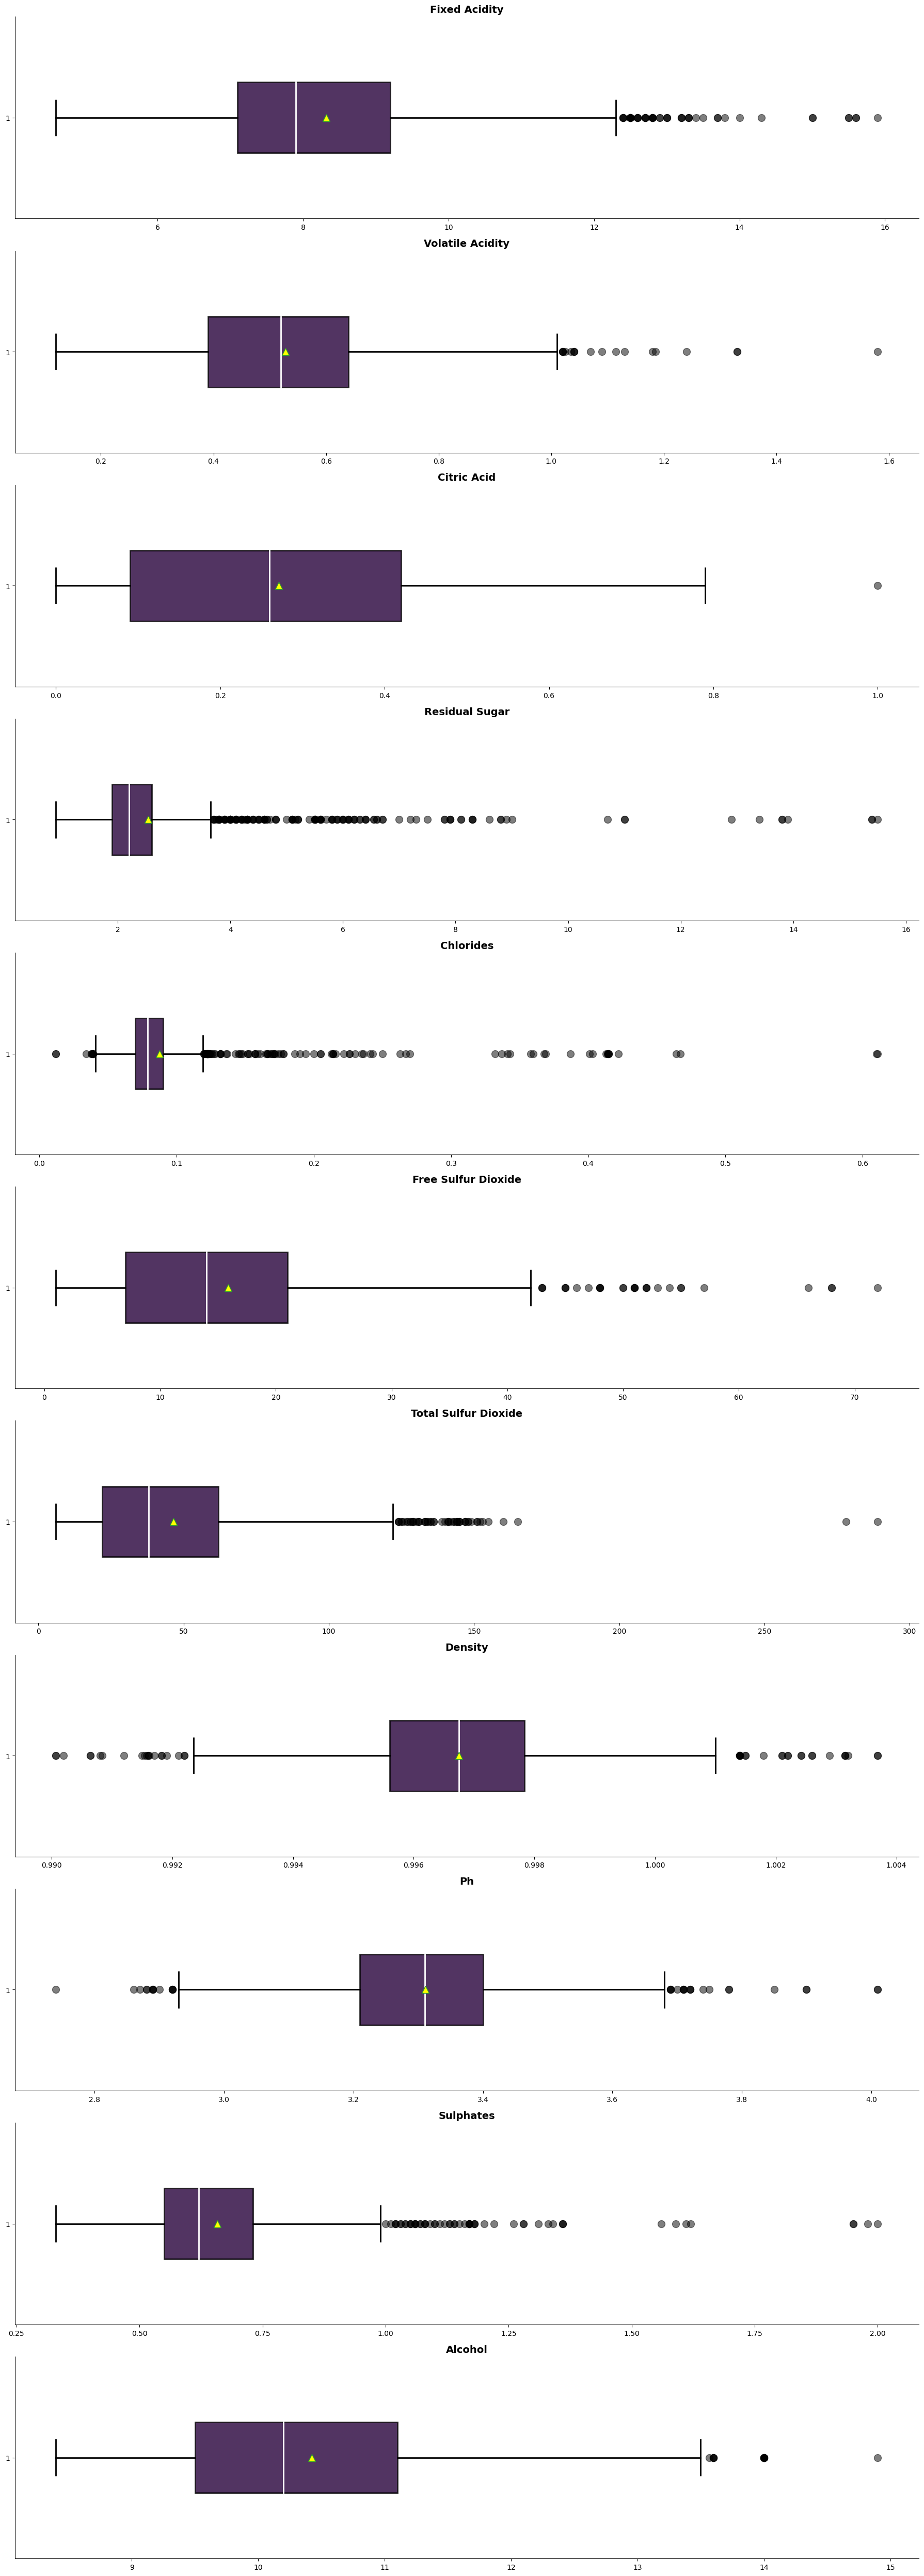

In [19]:
plotIndex = 1
plt.figure(figsize=(18,50))
for i in range(1, len(df.columns)):
    plt.subplot(11, 1, i)

    plt.boxplot(df[df.columns[i-1]], showmeans=True, widths=0.35, vert=0, patch_artist=True,
               flierprops=dict(markerfacecolor='k', marker='o', markersize=10, alpha=0.5),
               boxprops=dict(linewidth=2, facecolor='#27013b', color='k', alpha=0.8),
               meanprops=dict(markersize=10, markerfacecolor='yellow'),
               medianprops=dict(linewidth=2, color='white'),
               whiskerprops=dict(linewidth=2),
               capprops=dict(linewidth=2))
    
    plt.title(df.columns[i-1].title(), fontsize=14, weight='bold')
    sns.despine()
    plt.tight_layout()
    
plt.show()

In [20]:
# remove outliers if needed

# outlierColumns = df.columns[1:-1]

# def remove_outliers(n_std):
    
#     delete_idx = []   

#     for feature in outlierColumns:

#         for label in df.quality.unique():
            
#             x = df[df['quality'] == label]
#             mean = np.mean(x[feature])
#             standardDeviation = np.std(x[feature])
#             cleaned_data = x[(x[feature] < (mean-(standardDeviation*n_std))) | (x[feature] > (mean+(standardDeviation*n_std)))]
#             idx = cleaned_data.index.values
#             for i in idx: 
#                 delete_idx.append(i)
    
#     return set(delete_idx)
        
# idx = remove_outliers(2)    

# df.drop(index=idx, inplace=True)
# df.reset_index(drop=True, inplace=True)

# df.shape

## Scaling the data: StandardizationÂ¶

In [80]:
scalerIndex = [i for i in range(0, df.shape[1] - 1)]

x_transformer = ColumnTransformer(transformers=[ 
    ('standardScaler', StandardScaler(), scalerIndex)], 
                               remainder='passthrough')

X_train = x_transformer.fit_transform(X_train)
X_val = x_transformer.transform(X_val)
X_test = x_transformer.transform(X_test)

ploted scaled X_train data


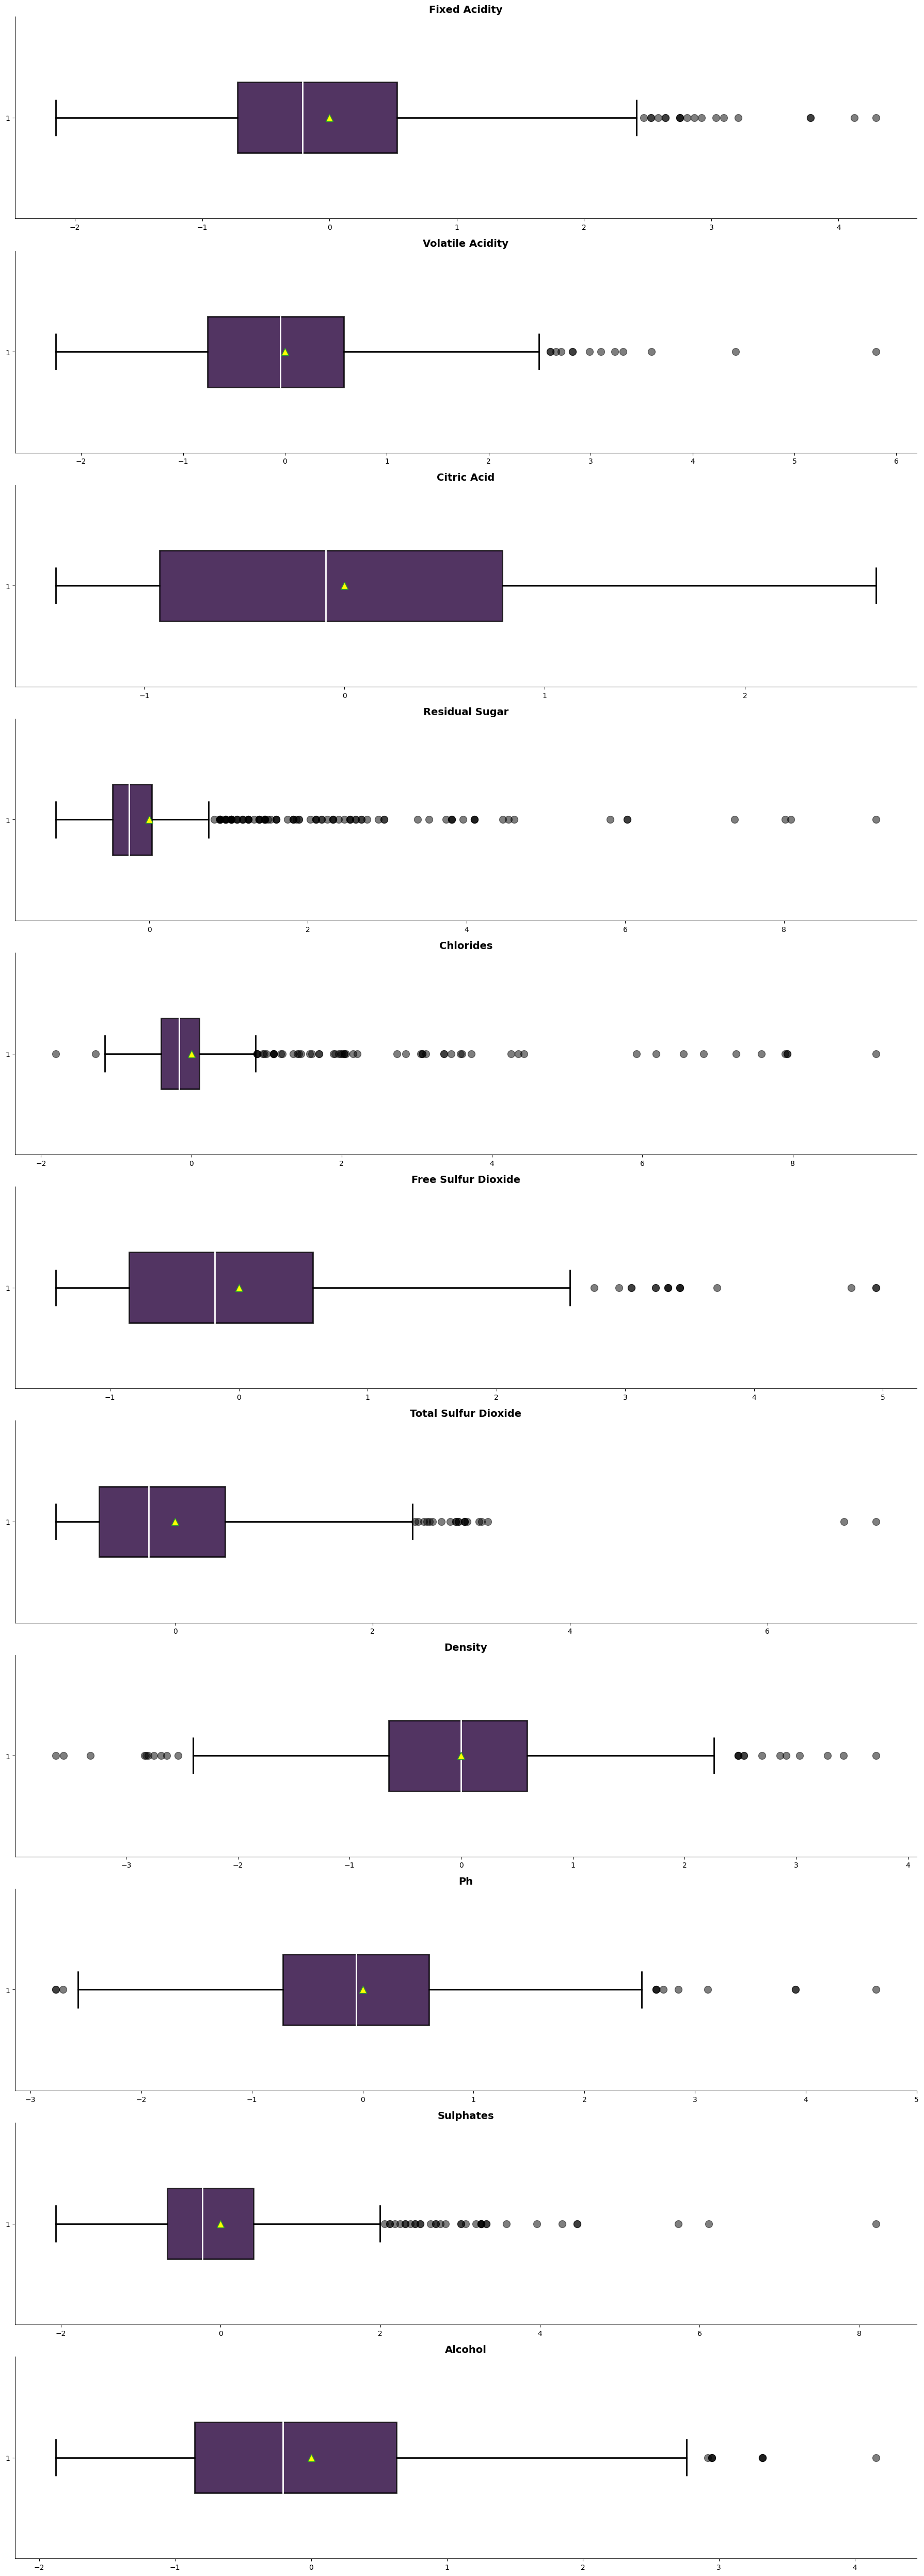

In [22]:
print("ploted scaled X_train data")

X_train_df = pd.DataFrame(X_train , columns=df.columns[:-1])

plotIndex = 1
plt.figure(figsize=(18,50))
for i in range(1, len(df.columns)):
    plt.subplot(11, 1, i)

    plt.boxplot(X_train_df[df.columns[i-1]], showmeans=True, widths=0.35, vert=0, patch_artist=True,
               flierprops=dict(markerfacecolor='k', marker='o', markersize=10, alpha=0.5),
               boxprops=dict(linewidth=2, facecolor='#27013b', color='k', alpha=0.8),
               meanprops=dict(markersize=10, markerfacecolor='yellow'),
               medianprops=dict(linewidth=2, color='white'),
               whiskerprops=dict(linewidth=2),
               capprops=dict(linewidth=2))
    
    plt.title(df.columns[i-1].title(), fontsize=14, weight='bold')
    sns.despine()
    plt.tight_layout()
    
plt.show()

<a id="7"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 7 </p> 

In [23]:
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(32, activation='relu'))   # First hidden layer 
model.add(Dense(16, activation='relu'))   # Second hidden layer

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,393
Trainable params: 3,393
Non-trainable params: 0
_________________________________________________________________


In [134]:
del model

<a id="8"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 8 </p> 

In [135]:
from keras.models import Sequential
from keras.layers import  Dense, BatchNormalization, Dropout

# Create a sequential model
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Print the model summary
# model.summary()

<a id="9"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 9 </p> 

In [136]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 128)               1536      
                                                                 
 batch_normalization_29 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_30 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 64)              

<a id="10"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 10 </p> 

In [85]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

loss_function = BinaryCrossentropy() 
optimizer=Adam(learning_rate=0.001)
acc = Accuracy()

# model.compile(loss=loss_function, optimizer=optimizer, metrics=(acc,)]

<a id="11"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 11 </p> 

In [137]:
# Compile the model 
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])                     #used this for training

In [127]:
#or 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(loss=BinaryCrossentropy() , optimizer=Adam(learning_rate=0.001) , metrics=( Accuracy() ,) )

<a id="12"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 12 </p> 

In [138]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32 ,verbose=1)

Epoch 1/50
30/30 [==============================] - 1s 12ms/step - loss: 0.7802 - accuracy: 0.5182 - val_loss: 0.6691 - val_accuracy: 0.6469
Epoch 2/50
30/30 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.5923 - val_loss: 0.6505 - val_accuracy: 0.6687
Epoch 3/50
30/30 [==============================] - 0s 6ms/step - loss: 0.6077 - accuracy: 0.6788 - val_loss: 0.6286 - val_accuracy: 0.7125
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 0.6035 - accuracy: 0.6663 - val_loss: 0.6078 - val_accuracy: 0.7188
Epoch 5/50
30/30 [==============================] - 0s 6ms/step - loss: 0.6023 - accuracy: 0.6705 - val_loss: 0.5883 - val_accuracy: 0.7437
Epoch 6/50
30/30 [==============================] - 0s 6ms/step - loss: 0.5726 - accuracy: 0.6924 - val_loss: 0.5784 - val_accuracy: 0.7469
Epoch 7/50
30/30 [==============================] - 0s 6ms/step - loss: 0.5777 - accuracy: 0.6799 - val_loss: 0.5674 - val_accuracy: 0.7469
Epoch 8/50
30/30 [=

<a id="13"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 13 </p> 

In [152]:
# Get the model's parameters
model_params = []

for layer in model.layers:
    if len(layer.get_weights()) > 0:
        try:
                weights, biases = layer.get_weights()
        except:
                weights, biases ,_ ,_ = layer.get_weights()
        model_params.append((weights, biases))

# Print the parameters for each layer
for idx, (weights, biases) in enumerate(model_params):
    print(f"Layer {idx + 1} - Weights shape: {weights.shape}, Biases shape: {biases.shape}")

Layer 1 - Weights shape: (11, 128), Biases shape: (128,)
Layer 2 - Weights shape: (128,), Biases shape: (128,)
Layer 3 - Weights shape: (128, 64), Biases shape: (64,)
Layer 4 - Weights shape: (64,), Biases shape: (64,)
Layer 5 - Weights shape: (64, 32), Biases shape: (32,)
Layer 6 - Weights shape: (32,), Biases shape: (32,)
Layer 7 - Weights shape: (32, 16), Biases shape: (16,)
Layer 8 - Weights shape: (16,), Biases shape: (16,)
Layer 9 - Weights shape: (16, 4), Biases shape: (4,)
Layer 10 - Weights shape: (4,), Biases shape: (4,)
Layer 11 - Weights shape: (4, 1), Biases shape: (1,)


In [51]:
# model.layers[0].get_weights()

4

<a id="14"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 14 </p> 

In [153]:
import pandas as pd

# Convert the history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
history_df.tail()

loss  accuracy  val_loss  val_accuracy
45  0.457983  0.787278  0.550145      0.762500
46  0.469963  0.792492  0.551971      0.750000
47  0.473862  0.783107  0.553470      0.759375
48  0.474568  0.778936  0.559813      0.759375
49  0.451599  0.805005  0.563583      0.765625

<a id="15"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 15 </p> 

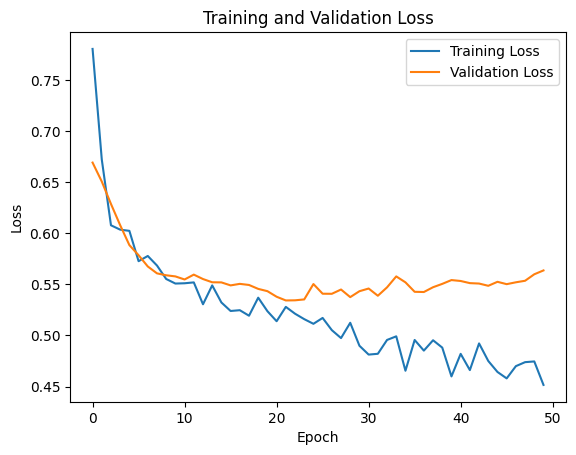

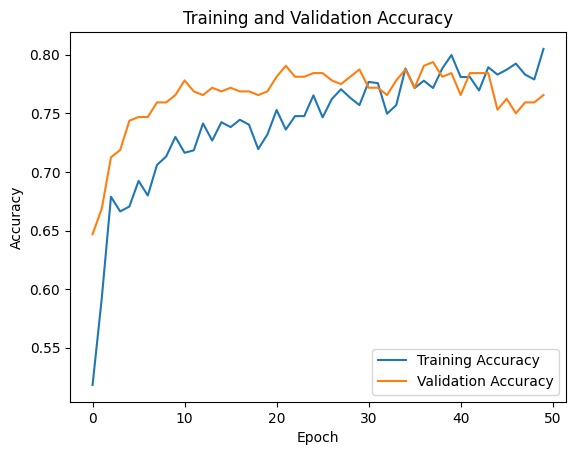

In [154]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

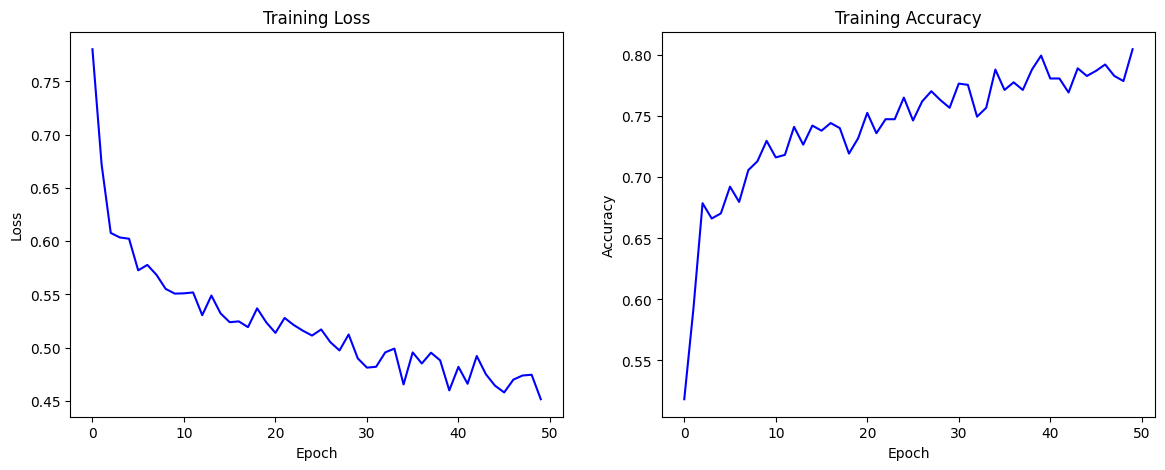

In [155]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='b' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

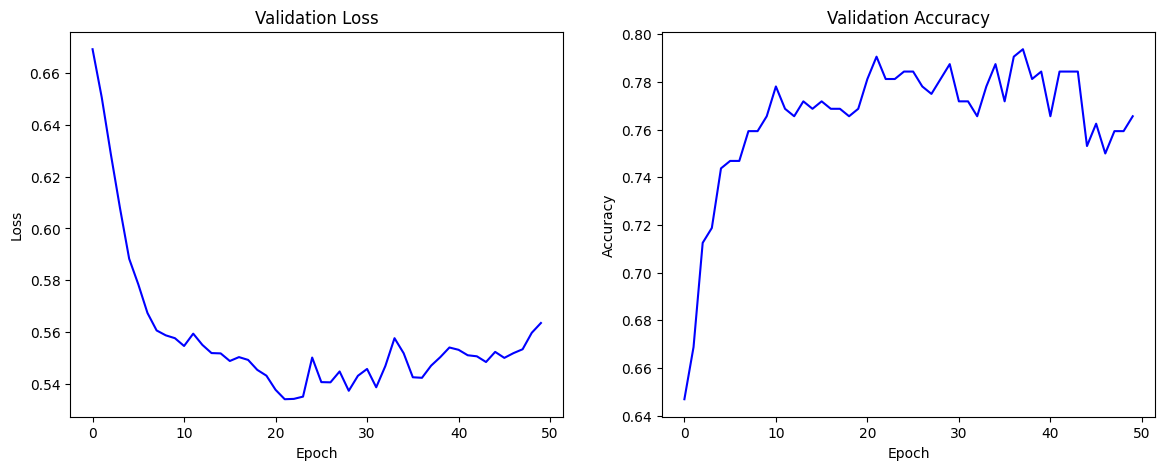

In [156]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], color='b' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')

plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'], color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

<a id="16"></a> 
 # <p style="padding:10px;background-color: #00004d ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">Ans 16 </p> 

In [157]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7656


In [158]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.49864616990089417
Test Accuracy: 0.765625


10/10 [==============================] - 0s 2ms/step


<AxesSubplot: >

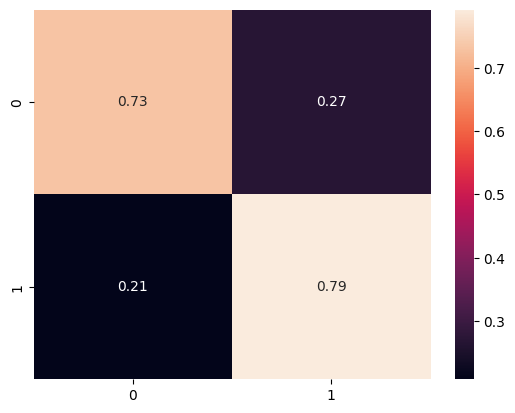

In [159]:
predictions = model.predict(X_test)
predictions = np.where(predictions < 0.5, 0, 1)

conMatrix = confusion_matrix(predictions, y_test, normalize='true')
sns.heatmap(conMatrix, annot=True)

<a id="18"></a> 
 # <p style="padding:10px;background-color: #01DFD7 ;margin:10;color: white ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px ;overflow:hidden;font-weight:50">END</p> 

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('wine.csv')

label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])

# Separate features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Split the data into train and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [119]:
# Create a sequential model
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
30/30 [==============================] - 1s 12ms/step - loss: 0.6723 - accuracy: 0.6455 - val_loss: 0.6902 - val_accuracy: 0.4938
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 0.7320 - val_loss: 0.6757 - val_accuracy: 0.5344
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.7508 - val_loss: 0.6568 - val_accuracy: 0.5719
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 0.4804 - accuracy: 0.7821 - val_loss: 0.6439 - val_accuracy: 0.5938
Epoch 5/50
30/30 [==============================] - 0s 5ms/step - loss: 0.4639 - accuracy: 0.7956 - val_loss: 0.6091 - val_accuracy: 0.6594
Epoch 6/50
30/30 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.7883 - val_loss: 0.5967 - val_accuracy: 0.6687
Epoch 7/50
30/30 [==============================] - 0s 6ms/step - loss: 0.4335 - accuracy: 0.8092 - val_loss: 0.5725 - val_accuracy: 0.7063
Epoch 8/50
30/30 [=

In [120]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.7500
Test Loss: 0.6646605730056763
Test Accuracy: 0.75


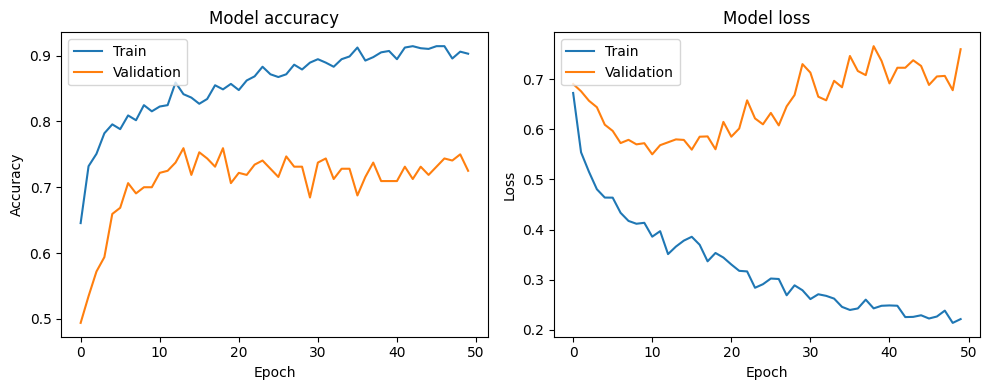

In [121]:
# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

10/10 [==============================] - 0s 8ms/step


<AxesSubplot: >

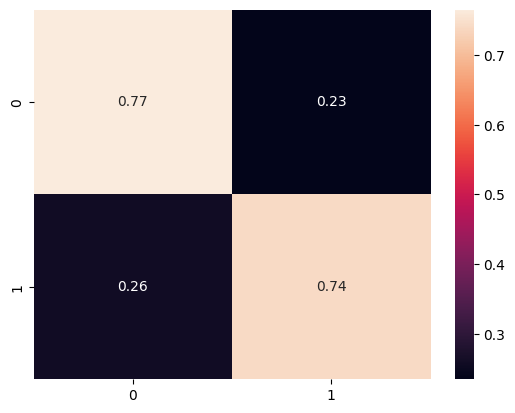

In [122]:
predictions = model.predict(X_test)
predictions = np.where(predictions < 0.5, 0, 1)

conMatrix = confusion_matrix(predictions, y_test, normalize='true')
sns.heatmap(conMatrix, annot=True)

In [123]:
# Convert the history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
history_df.tail()

loss  accuracy  val_loss  val_accuracy
45  0.222885  0.914494  0.688297      0.731250
46  0.226865  0.914494  0.705235      0.743750
47  0.238587  0.895725  0.706326      0.740625
48  0.214161  0.906152  0.677799      0.750000
49  0.221734  0.903024  0.759517      0.725000